# Knock airport Weather
Author: Quyen Phan

Upload hly4935.csv file to assignments folder. 

#### Reading data

Since all the data from the 10/4/1996 to 31/7/1996 are missing, the plot will start fron the 31/7/1996

In [183]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Read the csv file, select data for analysis (skip 23 first rows) using parameter skiprows
df = pd.read_csv("hly4935.csv", skiprows=23,low_memory=False)

# modify the format of 'date'
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')

# Remove the first row of the dataframe
df = df.iloc[1:]
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6


#### Plot the temperature

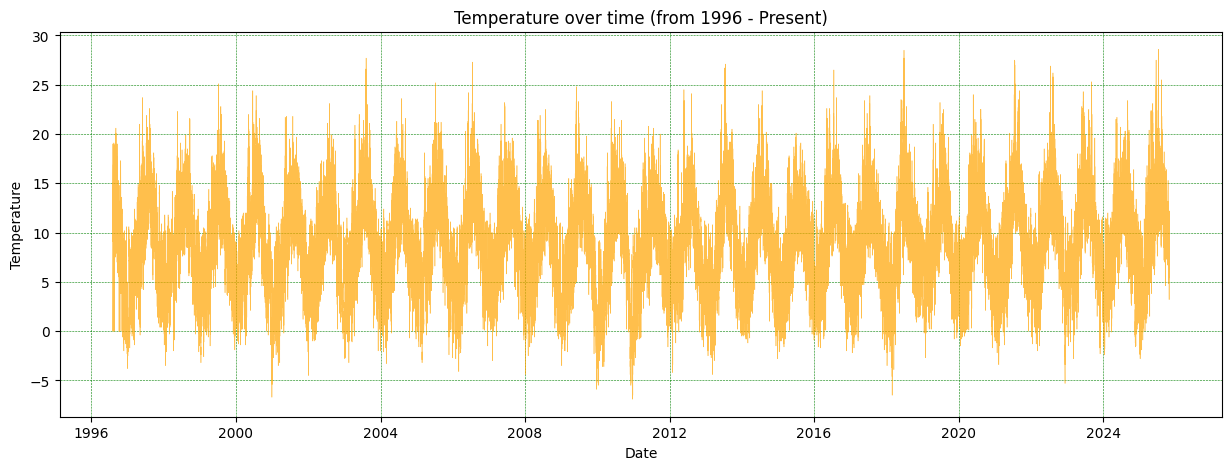

In [232]:
# Plot temperature
plt.figure(figsize=(15,5))
plt.plot(df["date"], df["temp"], color="orange", linewidth=0.4, alpha=0.7)
plt.title('Temperature over time (from 1996 - Present)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.4)
plt.show()

#### Create new columns that store date and month

In [189]:
# Create a new columns: 'dateonly' and 'month' from 'date'
df['dateonly']= df['date'].dt.date
df['month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,25,82,0.0,40000,45,5,1996-07-31,1996-07
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,80,81,0.0,8000,32,7,1996-07-31,1996-07
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,25,82,0.0,28000,35,6,1996-07-31,1996-07


#### Pivote table: Date and mean temperature for each day

In [59]:
#Pivot table
df_anal = pd.pivot_table(df,values='temp',
                          index='dateonly',
                          aggfunc='mean')

#### Plot the mean temperature each day

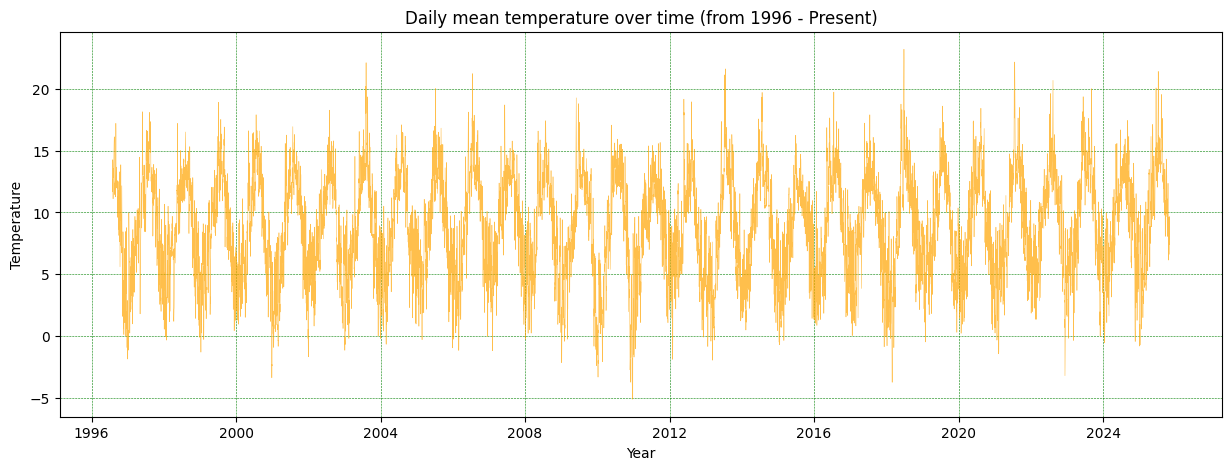

In [233]:
# Plot mean temperature each day
plt.figure(figsize=(15,5))
df_anal['temp'].plot(color="orange",linewidth=0.4, alpha=0.7)
#plt.plot(df_anal.index, df_anal["temp"], color="orange")
plt.title('Daily mean temperature over time (from 1996 - Present)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.4)
plt.show()

#### Pivote table: Months and mean temperature for each month

In [61]:
#Pivot table
df_anal1 = pd.pivot_table(df,values='temp',
                          index='month',
                          aggfunc='mean')

#### Plot the mean temperature for each month

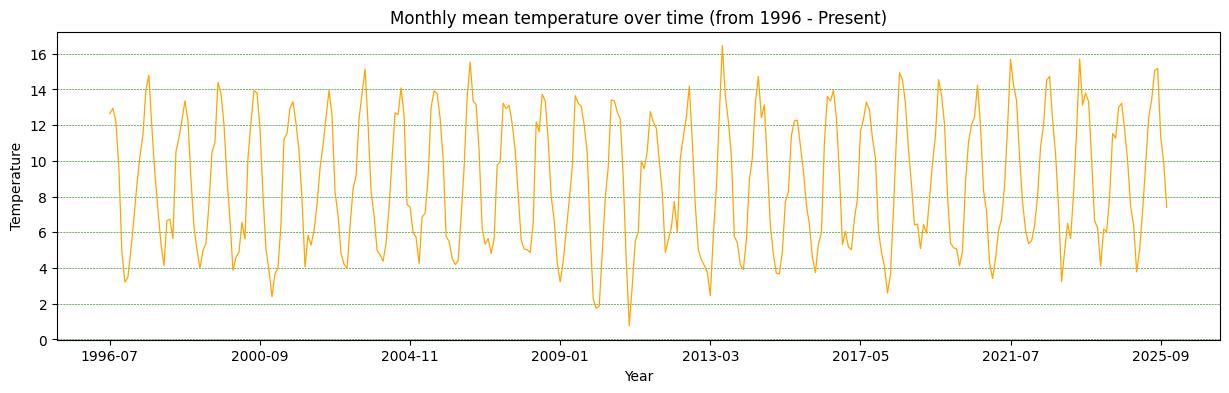

In [237]:
# Plot mean temperature each month
plt.figure(figsize=(15,4))
df_anal1['temp'].plot(color="orange",linewidth=0.9)
plt.title('Monthly mean temperature over time (from 1996 - Present)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.4)
plt.show()

#### Plot the Windspeed (there is data missing from this column)

In [185]:
# change the type on 'wdsp' to numeric
df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")

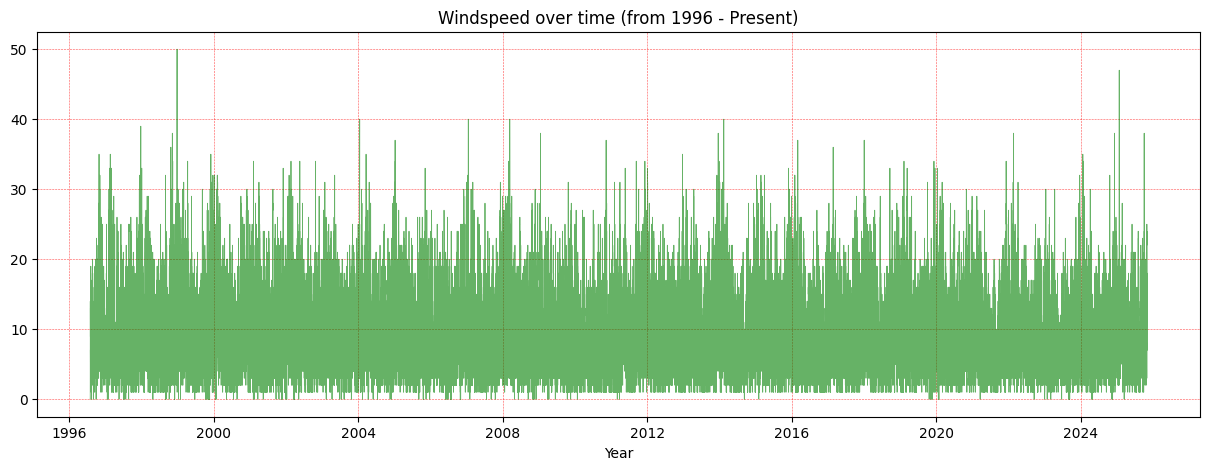

In [226]:
# Plot the windspeed
plt.figure(figsize=(15,5))
plt.plot(df['date'],df["wdsp"], color="green",alpha=0.6,linewidth=0.6)
plt.title('Windspeed over time (from 1996 - Present)')
plt.xlabel('Year')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.4, alpha=0.7)
plt.locator_params(axis='y', nbins=8)
plt.show()

#### Plot the rolling windspeed (say over 24 hours)

In [216]:
# Set column 'date' as index
df1 = df.set_index('date')#.sort_index()
df1.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
date,,,,,,,,,,,,,,,,,,,,,
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,25,82,0.0,40000,45,5,1996-07-31,1996-07
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,80,81,0.0,8000,32,7,1996-07-31,1996-07
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,25,82,0.0,28000,35,6,1996-07-31,1996-07


In [ ]:
print(df1.index.max())

2025-11-01 00:00:00


In [217]:
# --- IMPORTANT ---
# Reindex to continuous hourly timestamps (fills all missing hours)
df1 = df1.reindex(pd.date_range(df1.index.min(), df1.index.max(), freq='h'))

In [218]:
# Interpolate missing windspeed (linear is best for meteorological data)
df1['wdsp'] = df1['wdsp'].interpolate(method='time', limit_direction='both', limit_area='inside', limit=500)
df1.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,dateonly,month
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,25,82,0.0,40000,45,5,1996-07-31,1996-07
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,80,81,0.0,8000,32,7,1996-07-31,1996-07
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,25,82,0.0,28000,35,6,1996-07-31,1996-07


In [219]:
# Calculating Rolling Mean 24-hour
df1['wdsp24h'] = df1['wdsp'].rolling('24h').mean()
df1['wdsp24h'].head()

1996-07-31 08:00:00    0.0
1996-07-31 09:00:00    0.0
1996-07-31 10:00:00    0.0
1996-07-31 11:00:00    0.0
1996-07-31 12:00:00    0.0
Freq: h, Name: wdsp24h, dtype: float64

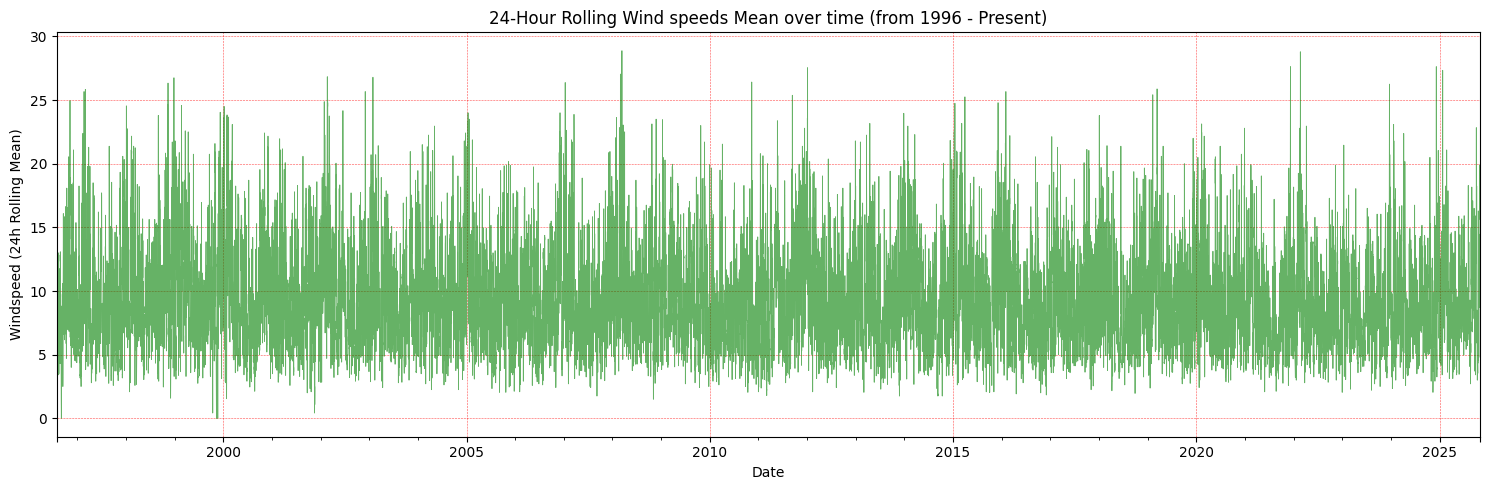

In [228]:
# Plot
plt.figure(figsize=(15,5))
df1['wdsp24h'].plot(color="green",alpha=0.6,linewidth=0.6)
plt.title("24-Hour Rolling Wind speeds Mean over time (from 1996 - Present)")
plt.xlabel("Date")
plt.ylabel("Windspeed (24h Rolling Mean)")
plt.tight_layout()
plt.grid(color = 'red', linestyle = '--', linewidth = 0.4, alpha=0.7)
plt.show()

#### Pivot table: Date and max windspeed for each day

In [215]:
df_anal2 = pd.pivot_table(df,values='wdsp',
                          index='dateonly',
                          aggfunc='max')
print(df_anal2)

            wdsp
dateonly        
1996-07-31   0.0
1996-08-01  14.0
1996-08-02  13.0
1996-08-03  10.0
1996-08-04  18.0
...          ...
2025-10-28  15.0
2025-10-29  15.0
2025-10-30  25.0
2025-10-31  20.0
2025-11-01   7.0

[10686 rows x 1 columns]


#### Plot the max windspeed for each day

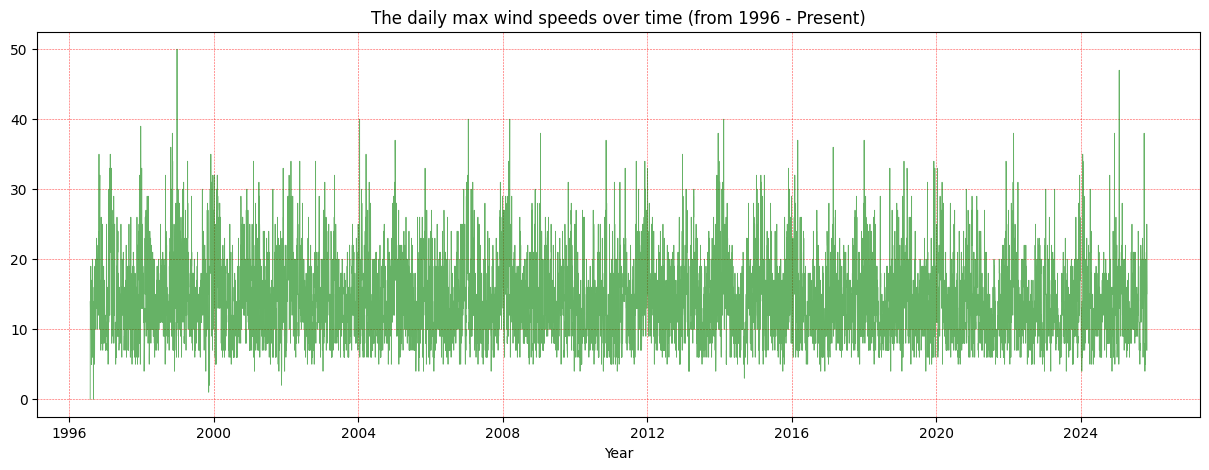

In [229]:
plt.figure(figsize=(15,5))
#df_anal2['wdsp'].plot()
plt.plot(df_anal2.index, df_anal2["wdsp"],color="green",alpha=0.6,linewidth=0.6)
plt.title('The daily max wind speeds over time (from 1996 - Present)')
plt.xlabel('Year')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.4, alpha=0.7)
plt.show()

#### Pivote table: Date, month and daily max windspeed

In [208]:
#Pivot table
df_anal2 = pd.pivot_table(df,values='wdsp',
                          index=['dateonly','month'],
                          aggfunc='max')
print(df_anal2)

                    wdsp
dateonly   month        
1996-07-31 1996-07   0.0
1996-08-01 1996-08  14.0
1996-08-02 1996-08  13.0
1996-08-03 1996-08  10.0
1996-08-04 1996-08  18.0
...                  ...
2025-10-28 2025-10  15.0
2025-10-29 2025-10  15.0
2025-10-30 2025-10  25.0
2025-10-31 2025-10  20.0
2025-11-01 2025-11   7.0

[10686 rows x 1 columns]


In [209]:
# Turn into dataframe
df_anal3 = df_anal2.reset_index()

In [210]:
df_anal4 = pd.pivot_table(df_anal3,values='wdsp',
                          index='month',
                          aggfunc='mean')
df_anal4.head()

,wdsp
month,
1996-07,0.000000
1996-08,12.516129
1996-09,12.266667
1996-10,18.193548
1996-11,17.133333


#### Plot the monthly mean of the daily max windspeeds

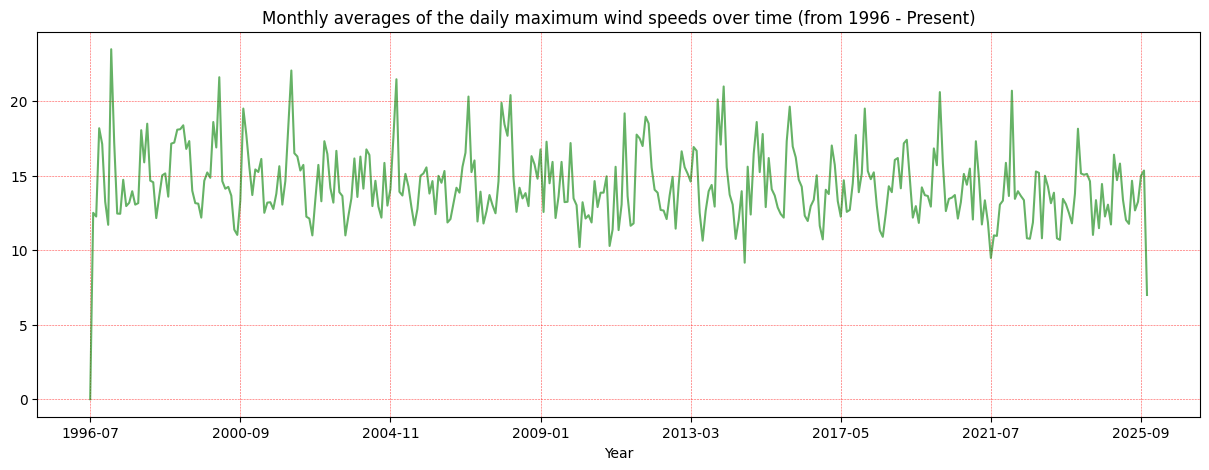

In [231]:
plt.figure(figsize=(15,5))
df_anal4['wdsp'].plot(color="green",alpha=0.6)
#plt.plot(df_anal4.index, df_anal4["wdsp"], color="grey")
plt.title('Monthly averages of the daily maximum wind speeds over time (from 1996 - Present)')
plt.xlabel('Year')
plt.grid(color = 'red', linestyle = '--', linewidth = 0.4, alpha=0.7)
plt.show()

#### References:
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

https://www.w3schools.com/python/matplotlib_grid.asp

https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html#pandas.DataFrame.set_index

https://www.geeksforgeeks.org/python/pandas-rolling-mean-by-time-interval/
